In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv(r"D:\230970006_ML\ML-MCAIIISEM-MLLABDOCS-22JULY2024\WEEK3\SLR DATA SETS\income.data.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

In [30]:
print(df.columns)

Index(['income', 'happiness'], dtype='object')


In [31]:
df

,income,happiness
0,3.862647,2.314489
1,4.979381,3.433490
2,4.923957,4.599373
3,3.214372,2.791114
4,7.196409,5.596398
...,...,...
493,5.249209,4.568705
494,3.471799,2.535002
495,6.087610,4.397451
496,3.440847,2.070664


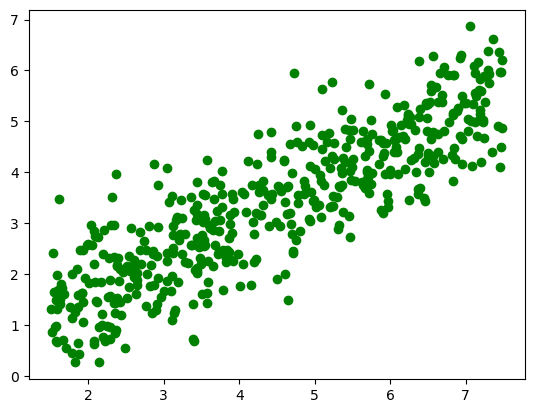

In [32]:
plt.scatter(df['income'], df['happiness'], color='green')

In [33]:
corr_matrix = df.corr()
corr_matrix

,income,happiness
income,1.000000,0.865634
happiness,0.865634,1.000000


<AxesSubplot:>

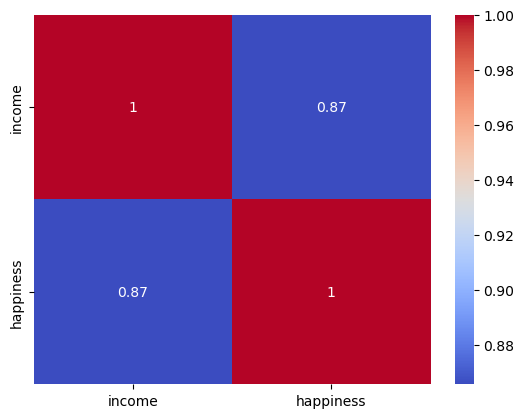

In [34]:
import seaborn as sns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [81]:
X = df.drop('happiness', axis=1)
y = df.happiness

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
X_train.shape

(348, 1)

In [83]:
print(f"X train: {X_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y train: {y_train.shape}")
print(f"y test: {y_test.shape}")

X train: (348, 1)
X test: (150, 1)
y train: (348,)
y test: (150,)


In [84]:
type(X_train)

pandas.core.frame.DataFrame

In [85]:
linearReg = LinearRegression()

In [86]:
linearReg.fit(X_train, y_train)

LinearRegression()

In [87]:
predicted = linearReg.predict(X_test)

In [88]:
print(f"R2 score: {r2_score(y_test, predicted)}")

R2 score: 0.7184832708195084


In [89]:
b0 = linearReg.coef_
b1 = linearReg.intercept_

In [97]:
y_predict = linearReg.predict(X_test)
# y_predict.flatten()

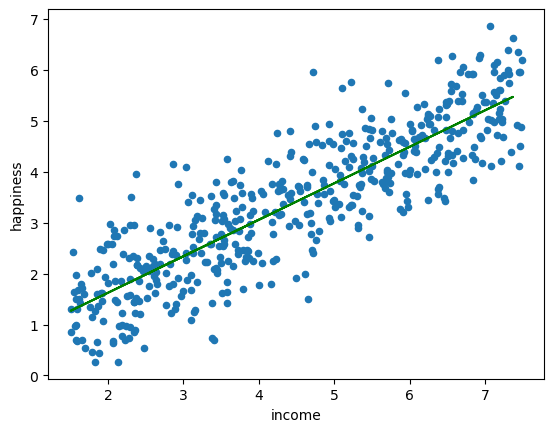

In [99]:
df.plot(kind='scatter', x='income', y='happiness')
plt.plot(X_test, y_predict, color='green')

In [109]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [105]:
print(f"RMSE Score: {mean_squared_error(y_test, predicted, squared=False)}")

RMSE Score: 0.7606756120328129


In [106]:
from tabulate import tabulate

In [114]:
all_data = [['Sl.No','Training','Testing','Slope','Intercept','MSE','MAE','RMSE']]

k=1

for i in [.3,.25,.2,.15,.1]:
    table_list = []
    tr = 1-i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=0)
    X_train = np.array(X_train).reshape(-1, 1)
    X_test = np.array(X_test).reshape(-1, 1)
    linearReg = LinearRegression()
    linearReg.fit(X_train, y_train)
    c = linearReg.coef_
    m = linearReg.intercept_
    y_predicted = linearReg.predict(X_test)
    MSE = mean_squared_error(y_test, y_predicted, squared=True)
    MAE = mean_absolute_error(y_test, y_predicted)
    RMSE = mean_squared_error(y_test, y_predicted, squared=False)
    table_list.extend([k, tr, i, m, c, MSE, MAE, RMSE])
    all_data.append(table_list)
    k=k+1
    
print(all_data)
print(tabulate(all_data, headers="firstrow"))
tab = tabulate(all_data, headers="firstrow")
print(tab)

[['Sl.No', 'Training', 'Testing', 'Slope', 'Intercept', 'MSE', 'MAE', 'RMSE'], [1, 0.7, 0.3, 0.09227908323332956, array([0.73222258]), 0.5088435370300811, 0.5745060021336194, 0.7133326972949446], [2, 0.75, 0.25, 0.12729195521486458, array([0.72548753]), 0.5391811942147943, 0.5911865327969061, 0.734289584710824], [3, 0.8, 0.2, 0.12876507637843737, array([0.72564448]), 0.5838153585536913, 0.6174050608886751, 0.7640781102437704], [4, 0.85, 0.15, 0.13996525756758427, array([0.72499624]), 0.6000582627964917, 0.6226117488983882, 0.7746342768019575], [5, 0.9, 0.1, 0.1732201417559165, array([0.71984475]), 0.5999618785764462, 0.6359510039851373, 0.7745720615775179]]
  Sl.No    Training    Testing      Slope    Intercept       MSE       MAE      RMSE
-------  ----------  ---------  ---------  -----------  --------  --------  --------
      1        0.7        0.3   0.0922791     0.732223  0.508844  0.574506  0.713333
      2        0.75       0.25  0.127292      0.725488  0.539181  0.591187  0.7